In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_sales = pd.read_csv("cleaned_games.csv")
df_customer = pd.read_csv("sorted.csv")
df_sales.rename(columns={'title': 'name'}, inplace=True)
display(df_customer.columns)

display(df_sales.columns)

df_merged = pd.merge(df_customer, df_sales, on='name', how='inner')
display(df_merged.columns)

df_merged.to_csv('merged_data.csv', index=False)

Index(['name', 'platform', 'year', 'decade', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales', 'na_share',
       'eu_share', 'jp_share', 'other_share', 'rank', 'platform_group'],
      dtype='object')

Index(['name', 'team', 'sub_team', 'summary', 'sub_genres', 'rating',
       'times_listed', 'number_of_reviews', 'plays', 'playing', 'backlogs',
       'wishlist', 'time_since_release', 'reviews', 'genre'],
      dtype='object')

Index(['name', 'platform', 'year', 'decade', 'genre_x', 'publisher',
       'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales',
       'na_share', 'eu_share', 'jp_share', 'other_share', 'rank',
       'platform_group', 'team', 'sub_team', 'summary', 'sub_genres', 'rating',
       'times_listed', 'number_of_reviews', 'plays', 'playing', 'backlogs',
       'wishlist', 'time_since_release', 'reviews', 'genre_y'],
      dtype='object')

/tmp/ipython-input-928984374.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='number_of_reviews', data=top_rated_by_reviews, palette='viridis',width=0.1)


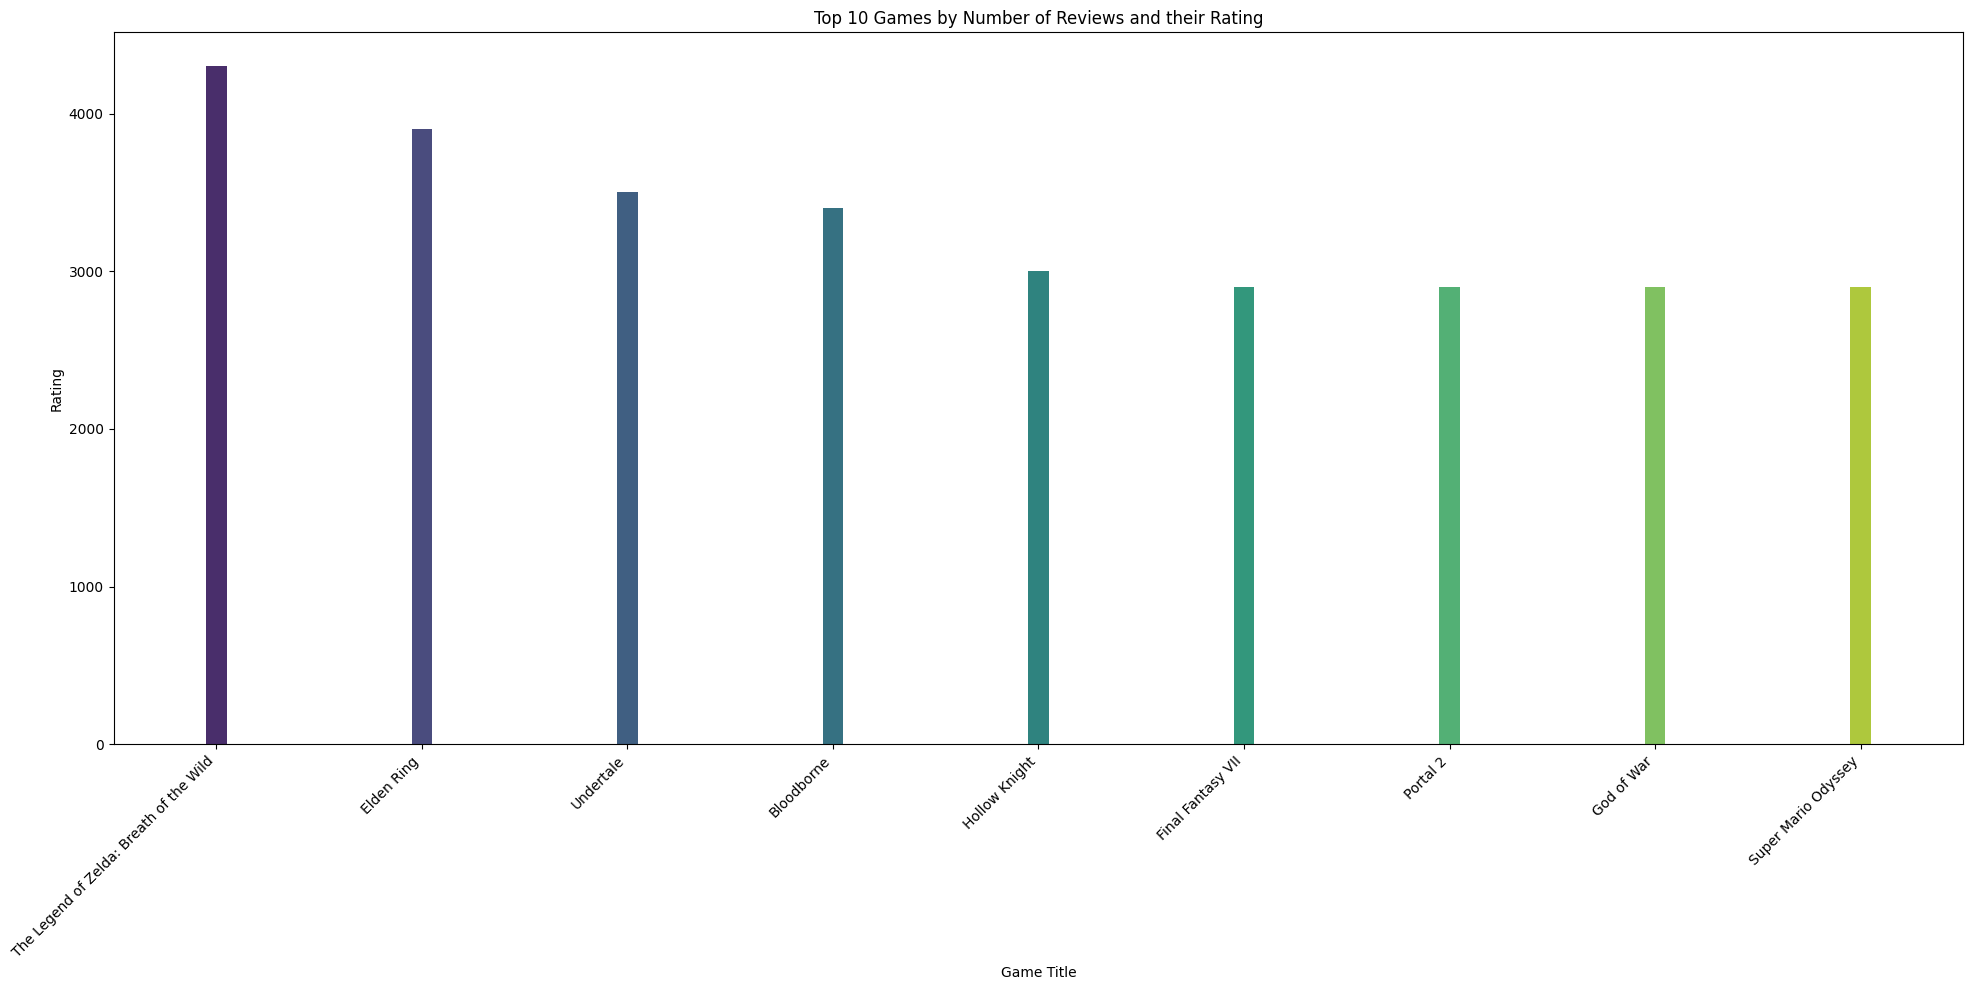

In [113]:
# 1. Sort by number of reviews and select the top games

top_rated_by_reviews = df_sales.sort_values(by='number_of_reviews', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x='name', y='number_of_reviews', data=top_rated_by_reviews, palette='viridis',width=0.1)
plt.title('Top 10 Games by Number of Reviews and their Rating')
plt.xlabel('Game Title')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3579371155.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='rating', data=top_rated_by_reviews, palette='viridis')


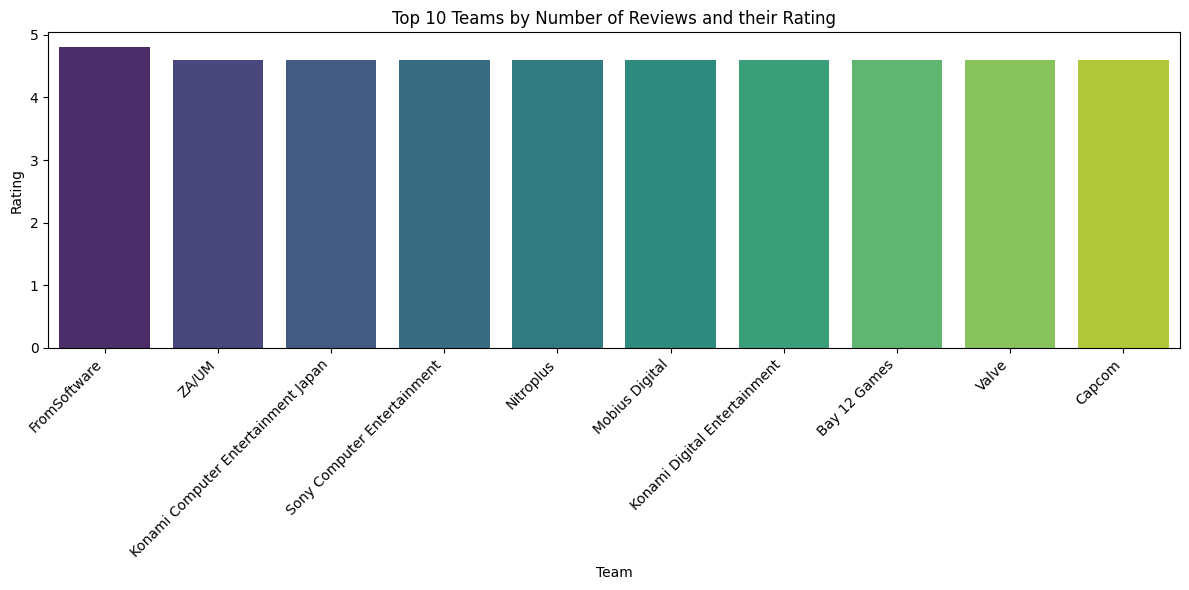

In [112]:
#2. Teams have the highest average ratings
top_rated_by_reviews = df_sales.sort_values(by='rating', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='rating', data=top_rated_by_reviews, palette='viridis')

plt.title('Top 10 Teams by Number of Reviews and their Rating')
plt.xlabel('Team')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1846317694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


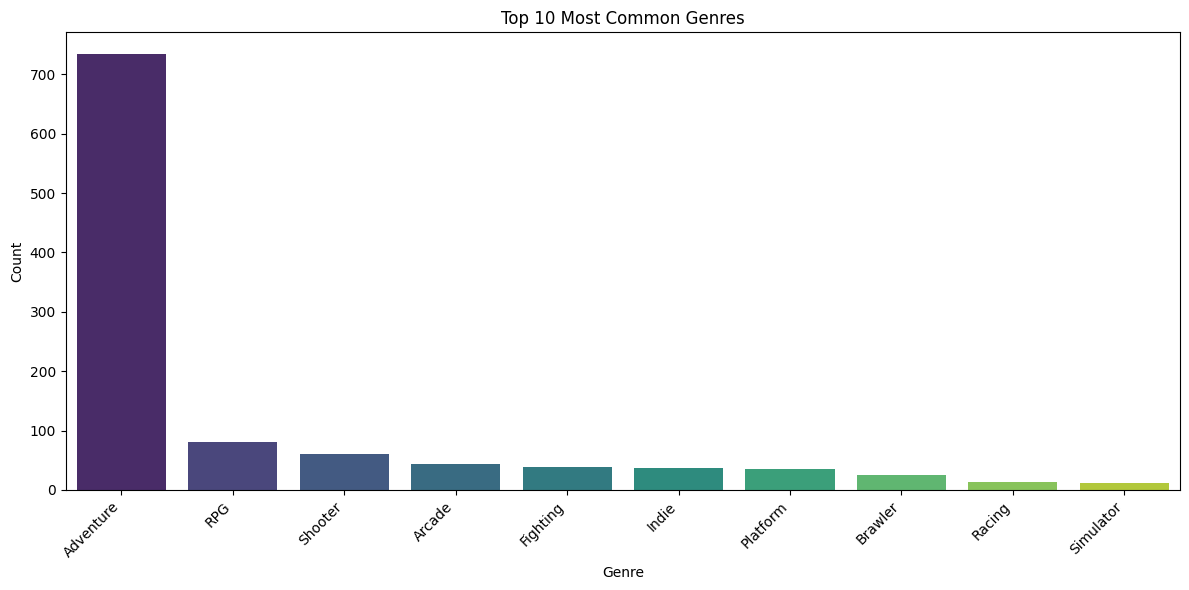

In [110]:
#3. Most common genres in the dataset
genre_counts = df_sales['genre'].explode().value_counts()
top_genres = genre_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1459078626.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='backlogs', y='wishlist', data=highest_backlog, palette='viridis')


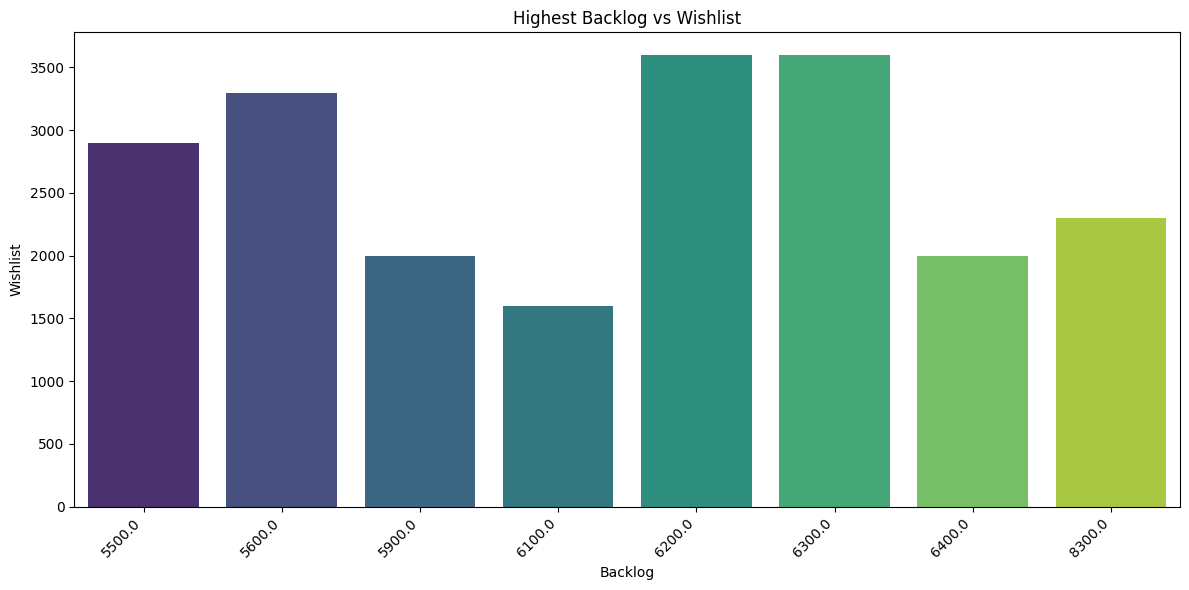

In [109]:
#4. the highest backlog compared to wishlist
highest_backlog = df_sales.sort_values(by='backlogs', ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='backlogs', y='wishlist', data=highest_backlog, palette='viridis')

plt.title('Highest Backlog vs Wishlist')
plt.xlabel('Backlog')
plt.ylabel('Wishlist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2074562319.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='release_count', data=release_counts_df, palette='viridis',width= 0.9)


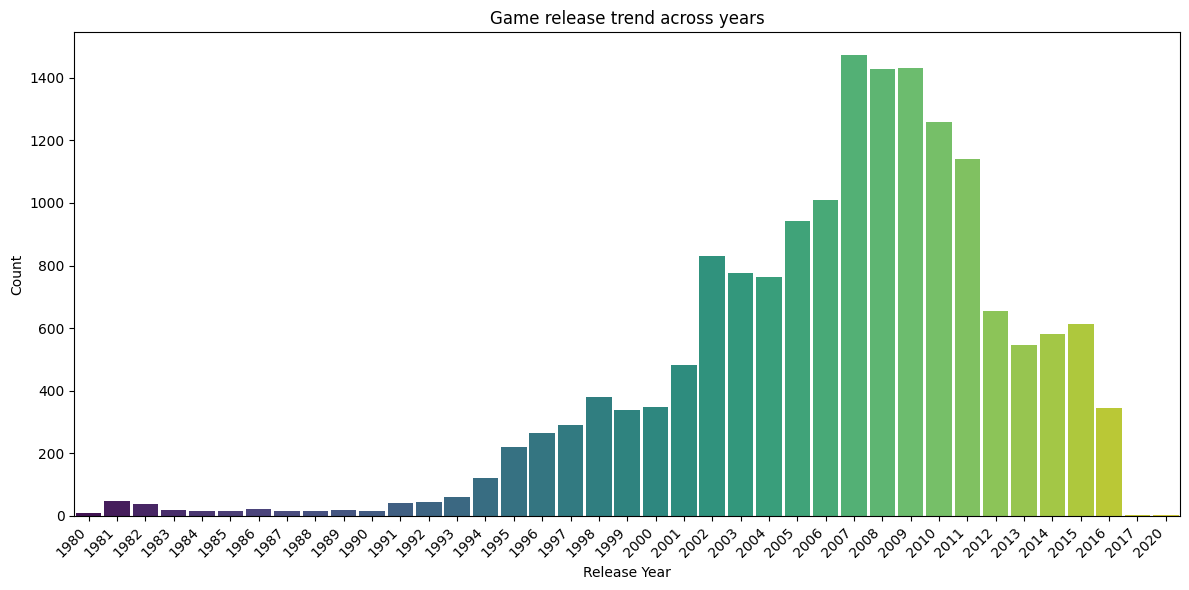

In [107]:
#5. The game release trend across years
release_counts_df=df_customer.groupby('year').size().reset_index(name='release_count')

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='release_count', data=release_counts_df, palette='viridis',width= 0.9)

plt.title('Game release trend across years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-815821909.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='rating_counts', data=rating_counts_df, palette='viridis')


Text(0, 0.5, 'Count')

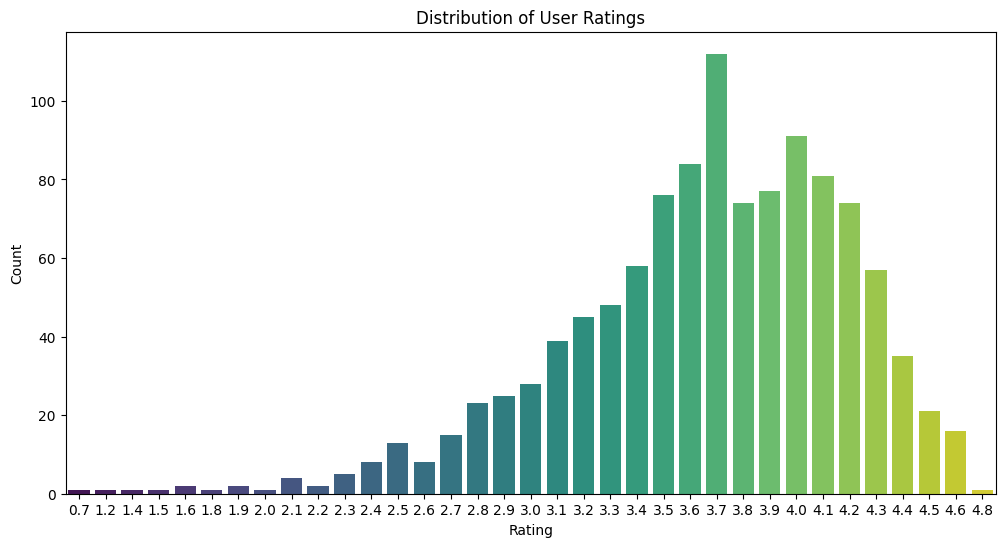

In [105]:
#6. The distribution of user ratings
rating_counts = df_sales['rating'].value_counts().sort_index()
rating_counts_df = rating_counts.reset_index()
rating_counts_df.columns = ['rating', 'rating_counts']
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='rating_counts', data=rating_counts_df, palette='viridis')
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

/tmp/ipython-input-4083918380.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='wishlist', data=top_rated_by_wishlist, palette='viridis',width= 0.1)


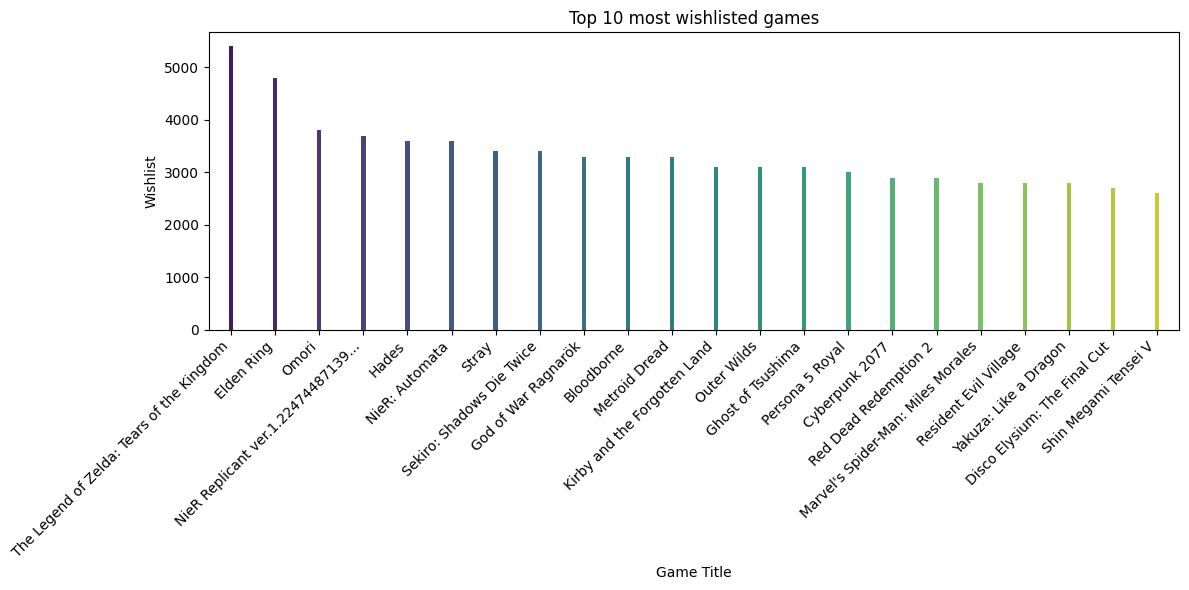

In [104]:
#7. The top 10 most wishlisted games
top_rated_by_wishlist = df_sales.sort_values(by='wishlist', ascending=False).head(24)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='wishlist', data=top_rated_by_wishlist, palette='viridis',width= 0.1)
plt.title('Top 10 most wishlisted games')
plt.xlabel('Game Title')
plt.ylabel('Wishlist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2829409261.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='average_plays', data=genre_plays_df, palette='viridis',width= 0.3)


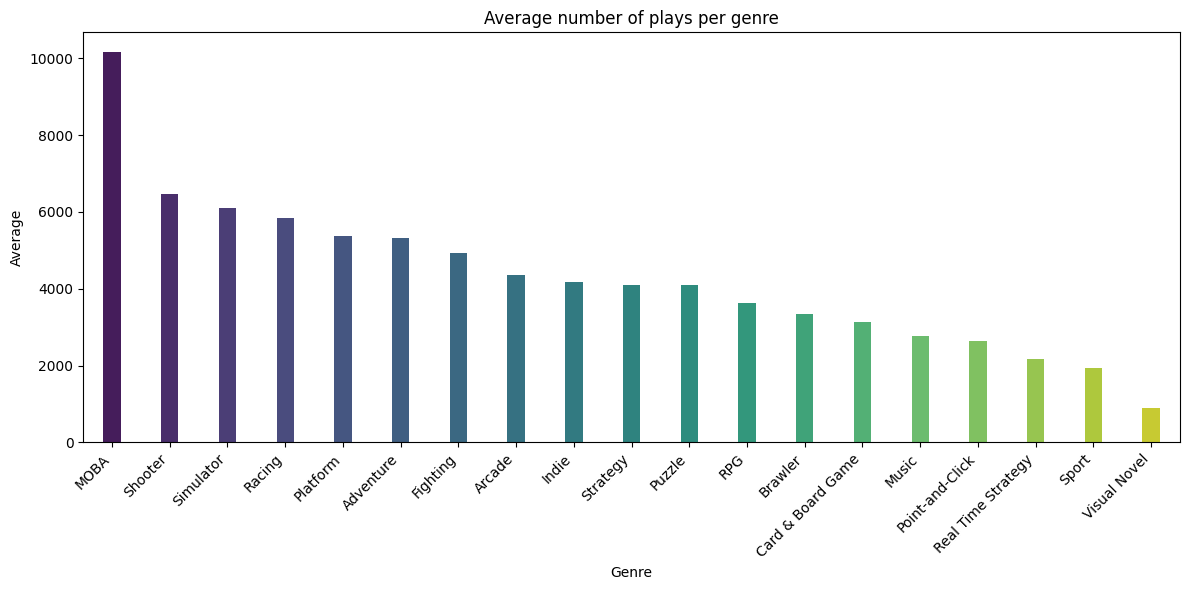

In [102]:
#8.  The average number of plays per genre
genre_plays = df_sales.groupby('genre')['plays'].mean()
genre_plays_df = genre_plays.reset_index()
genre_plays_df.columns = ['genre', 'average_plays']
genre_plays_df = genre_plays_df.sort_values(by='average_plays', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x='genre', y='average_plays', data=genre_plays_df, palette='viridis',width= 0.3)
plt.title('Average number of plays per genre')
plt.xlabel('Genre')
plt.ylabel('Average')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1501852399.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='count', data=developer_counts_df, palette='viridis')


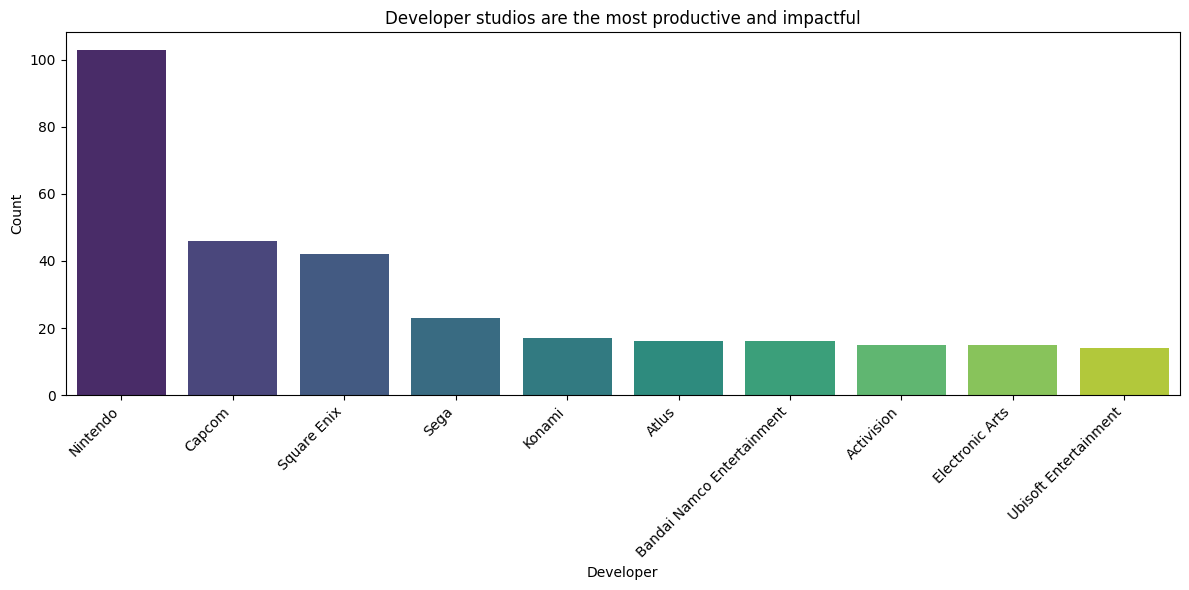

In [100]:
#9. Developer studios are the most productive and impactful
developer_counts = df_sales['team'].value_counts().head(10)
developer_counts_df = developer_counts.reset_index()
developer_counts_df.columns = ['team', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='team', y='count', data=developer_counts_df, palette='viridis')
plt.title('Developer studios are the most productive and impactful')
plt.xlabel('Developer')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

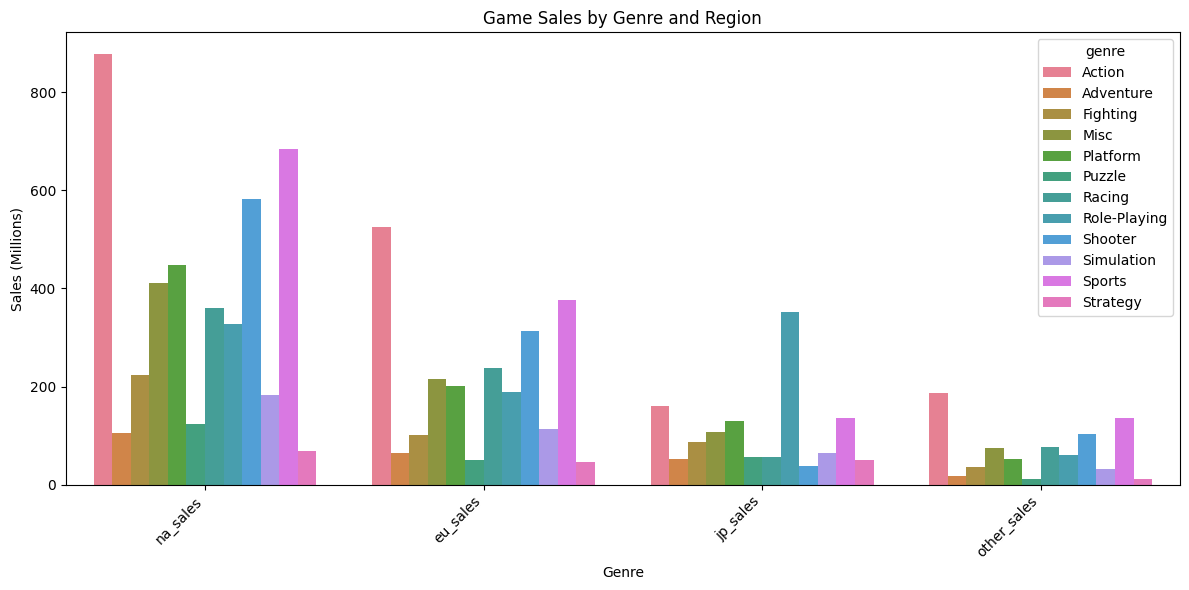

In [99]:
#10. region generates the most game sales

plt.figure(figsize=(12, 6))

# Group data by genre and sum sales for each region
genre_sales = df_customer.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
genre_sales_melted = genre_sales.melt(id_vars='genre', var_name='region', value_name='sales')

# Create the bar plot
sns.barplot(data=genre_sales_melted, x='region', y='sales', hue='genre')

plt.title('Game Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

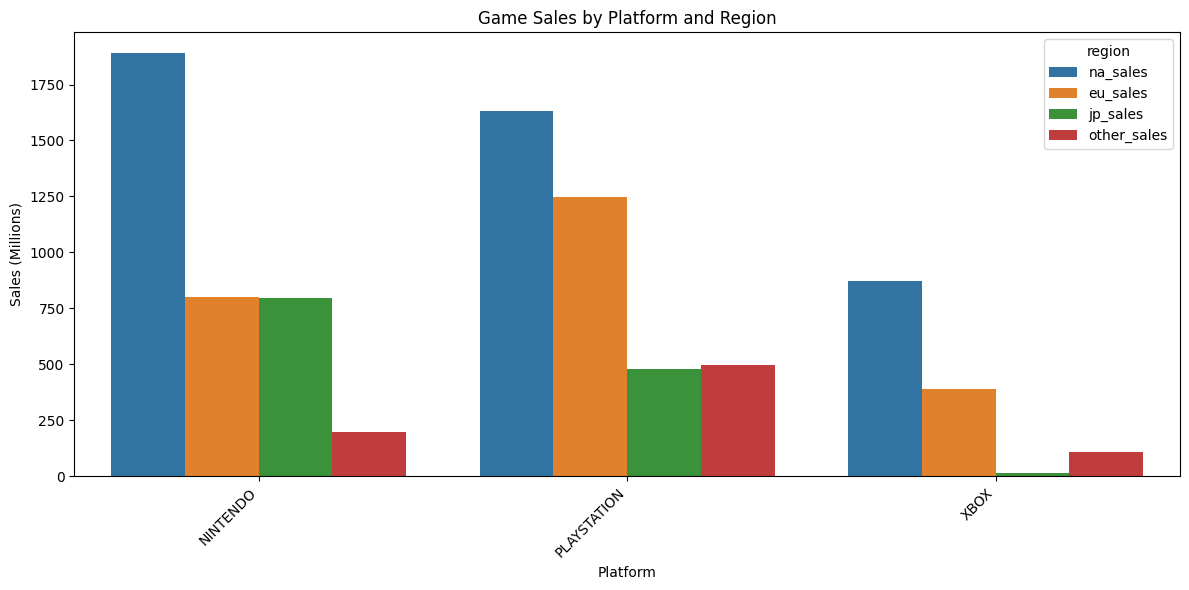

In [98]:
#11. best-selling platforms
plt.figure(figsize=(12, 6))

# Group data by genre and sum sales for each region
genre_sales = df_customer.groupby('platform_group')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
genre_sales_melted = genre_sales.melt(id_vars='platform_group', var_name='region', value_name='sales')

# Create the bar plot
sns.barplot(data=genre_sales_melted, x='platform_group', y='sales', hue='region')

plt.title('Game Sales by Platform and Region')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

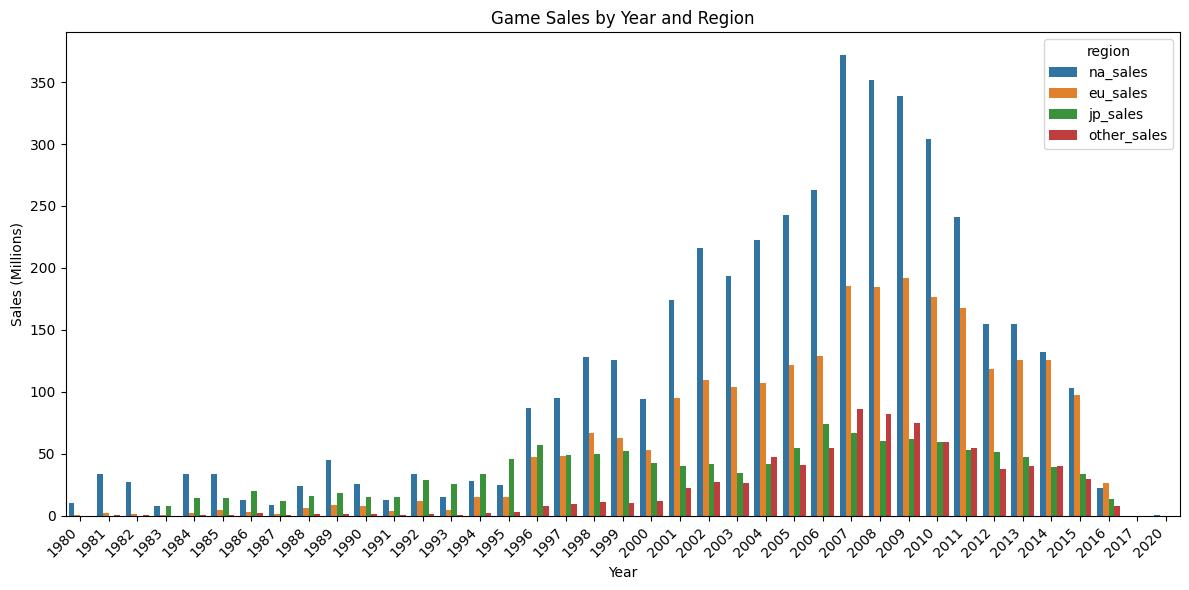

In [97]:
#12. trend of game releases and sales over years

plt.figure(figsize=(12, 6))

# Group data by year and sum sales for each region
year_sales = df_customer.groupby('year')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
year_sales_melted = year_sales.melt(id_vars='year', var_name='region', value_name='sales')

# Create the bar plot
sns.barplot(data=year_sales_melted, x='year', y='sales', hue='region')

plt.title('Game Sales by Year and Region')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

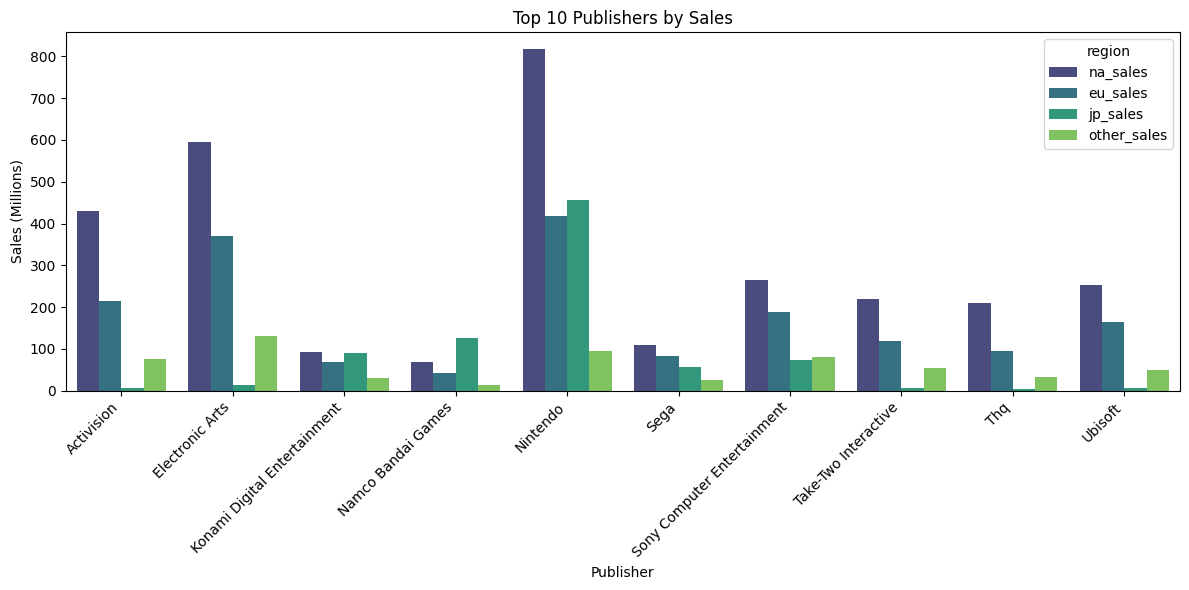

In [96]:
#13. the top publishers by sales


plt.figure(figsize=(12, 6))

# Calculate total sales for each publisher
publisher_total_sales = df_customer.groupby('publisher')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum().reset_index()

# Get the top 10 publishers by global sales
top_10_publishers = publisher_total_sales.nlargest(10, 'global_sales')

# Filter the original data to include only the top 10 publishers
top_10_data = df_customer[df_customer['publisher'].isin(top_10_publishers['publisher'])]

# Group the filtered data by publisher and sum sales for each region
publisher_sales = top_10_data.groupby('publisher')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
publisher_sales_melted = publisher_sales.melt(id_vars='publisher', var_name='region', value_name='sales')

plt.figure(figsize=(12, 6))
sns.barplot(data=publisher_sales_melted, x='publisher', y='sales', hue='region',palette='viridis')
plt.title('Top 10 Publishers by Sales')
plt.xlabel('Publisher')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

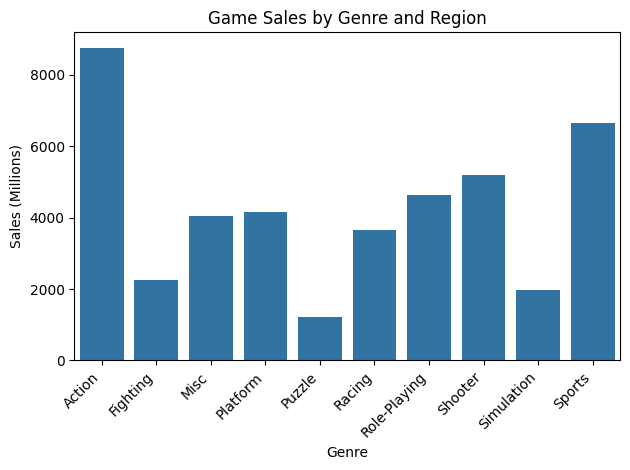

In [95]:
#14. the top 10 best-sellers globally
genre_total_sales = df_customer.groupby('genre')[['global_sales']].sum().reset_index()
top_10_genre = genre_total_sales.nlargest(10, 'global_sales')
genre_sales = top_10_genre.groupby('genre')[['global_sales']].sum().reset_index()
genre_sales_melted = genre_sales.melt(id_vars='genre', var_name='region', value_name='sales')
sns.barplot(data=genre_sales_melted, x='genre', y='sales')

plt.title('Game Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

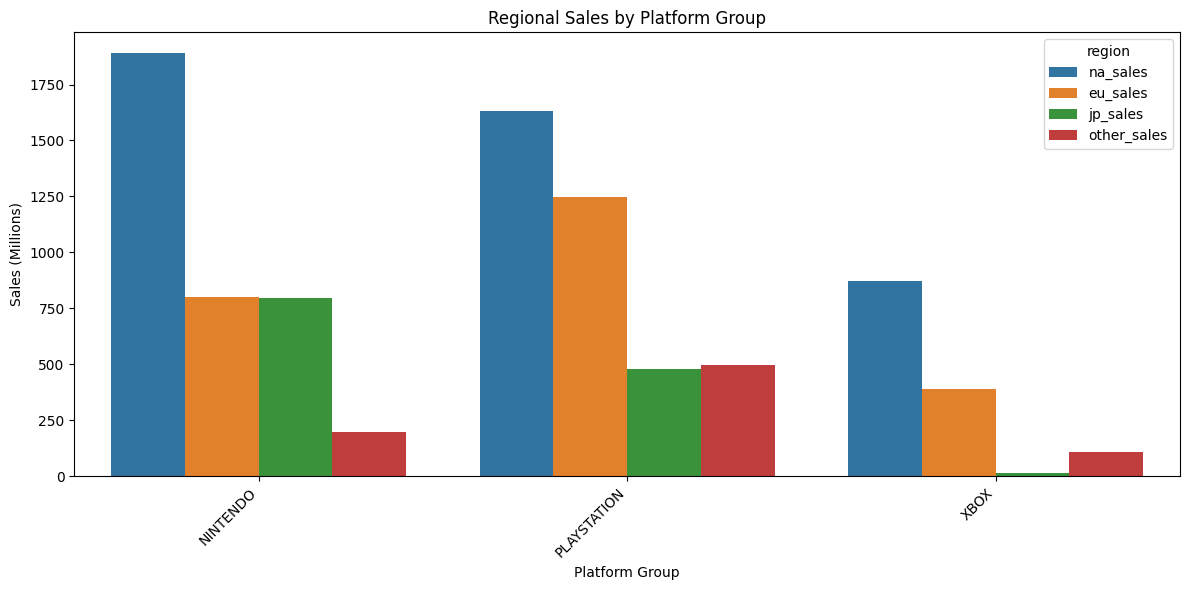

In [94]:
#15. regional sales compare for specific platforms

# Group data by platform group and sum sales for each region
platform_sales = df_customer.groupby('platform_group')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

# Melt the DataFrame to long format for easier plotting with seaborn
platform_sales_melted = platform_sales.melt(id_vars='platform_group', var_name='region', value_name='sales')

plt.figure(figsize=(12, 6))
sns.barplot(data=platform_sales_melted, x='platform_group', y='sales', hue='region')
plt.title('Regional Sales by Platform Group')
plt.xlabel('Platform Group')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

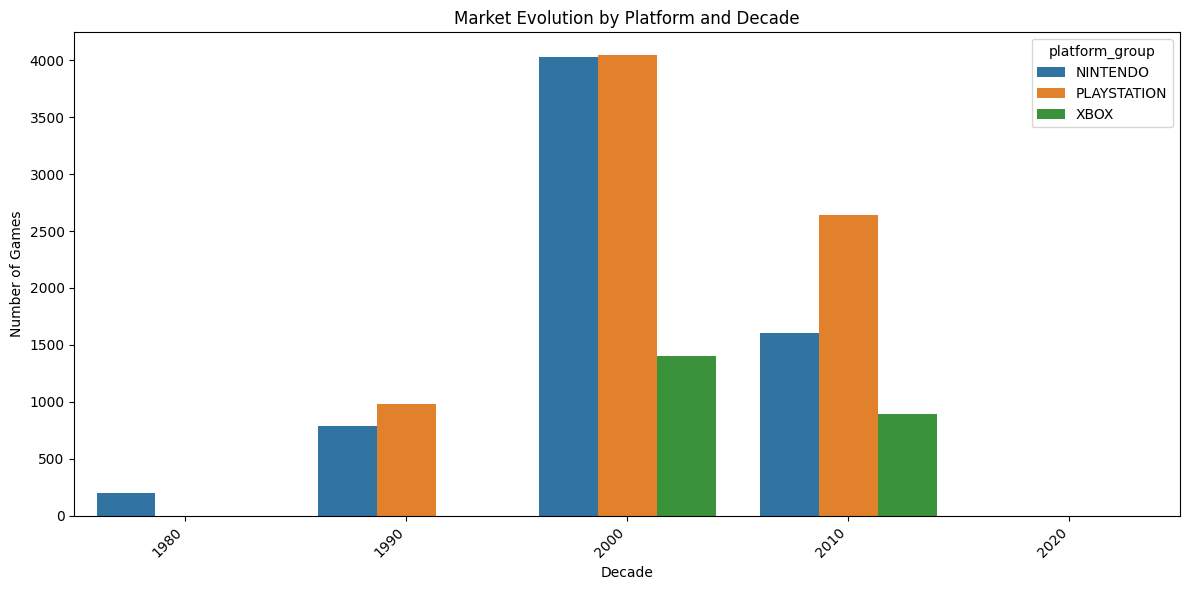

In [93]:
#16. the market evolved by platform over time

# Count the number of games per platform group and decade
platform_counts = df_customer.groupby(['decade', 'platform_group']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))

# Create the bar plot
sns.barplot(data=platform_counts, x='decade', y='count', hue='platform_group')

plt.title('Market Evolution by Platform and Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

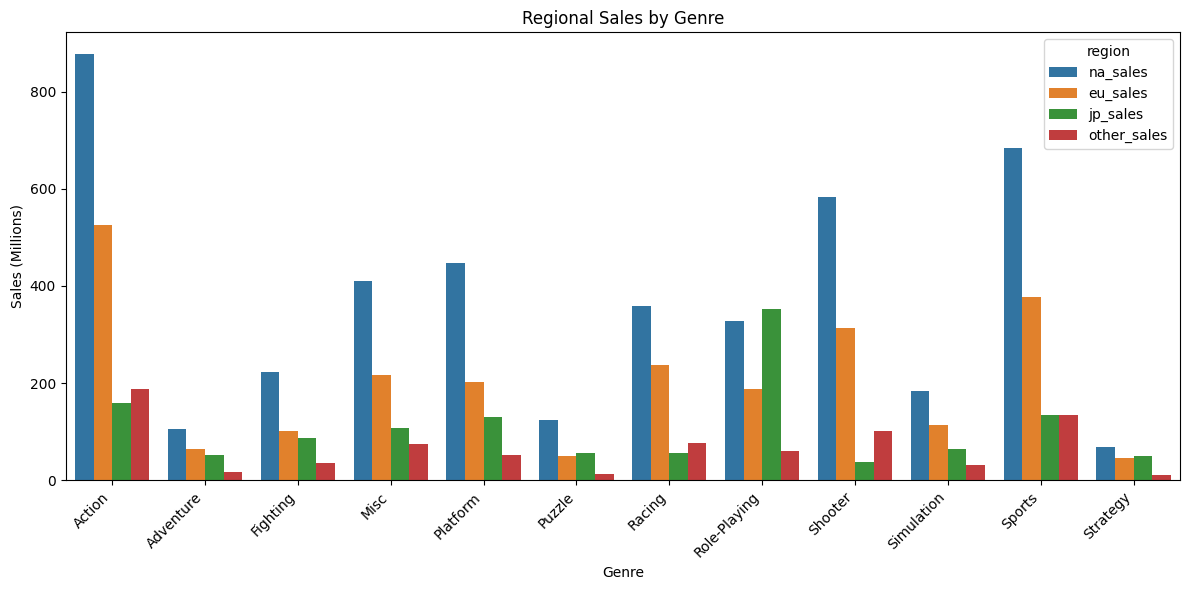

In [92]:
#17. the regional genre preferences

# Group data by genre and sum sales for each region
genre_sales = df_customer.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

genre_sales_melted = genre_sales.melt(id_vars='genre', var_name='region', value_name='sales')
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales_melted, x='genre', y='sales', hue='region')
plt.title('Regional Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

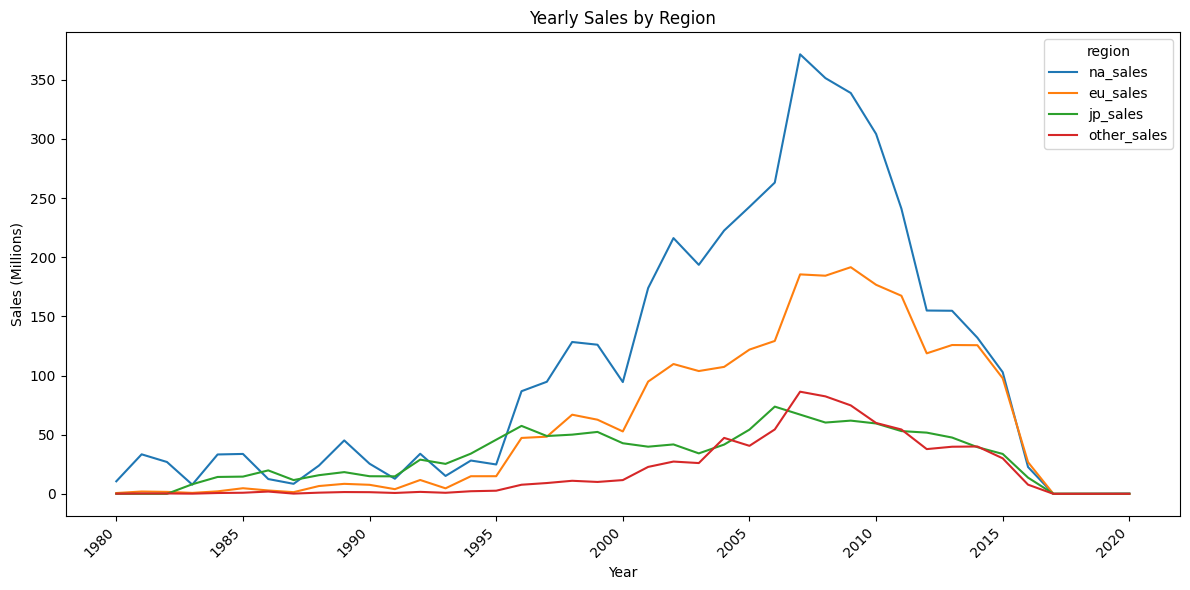

In [91]:
#18. yearly sales change per region

# Group data by year and sum sales for each region
year_sales = df_customer.groupby('year')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

year_sales_melted = year_sales.melt(id_vars='year', var_name='region', value_name='sales')
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_sales_melted, x='year', y='sales', hue='region')
plt.title('Yearly Sales by Region')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

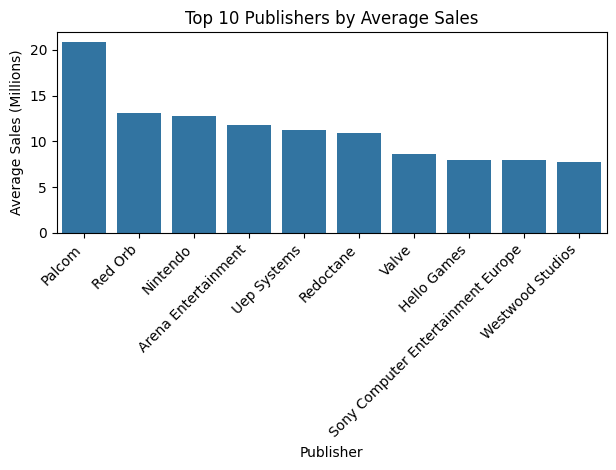

In [90]:
#19.the average sales per publisher


# Calculate average sales for each publisher
publisher_avg_sales = df_customer.groupby('publisher')[['global_sales']].mean().reset_index()

publisher_avg_sales_sorted = publisher_avg_sales.sort_values(by='global_sales', ascending=False)
sns.barplot(data=publisher_avg_sales_sorted.head(10), x='publisher', y='global_sales')

plt.title('Top 10 Publishers by Average Sales')
plt.xlabel('Publisher')
plt.ylabel('Average Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3254725785.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_games_per_platform = platform_sales.groupby('platform_group').apply(lambda x: x.nlargest(5, 'global_sales')).reset_index(drop=True)


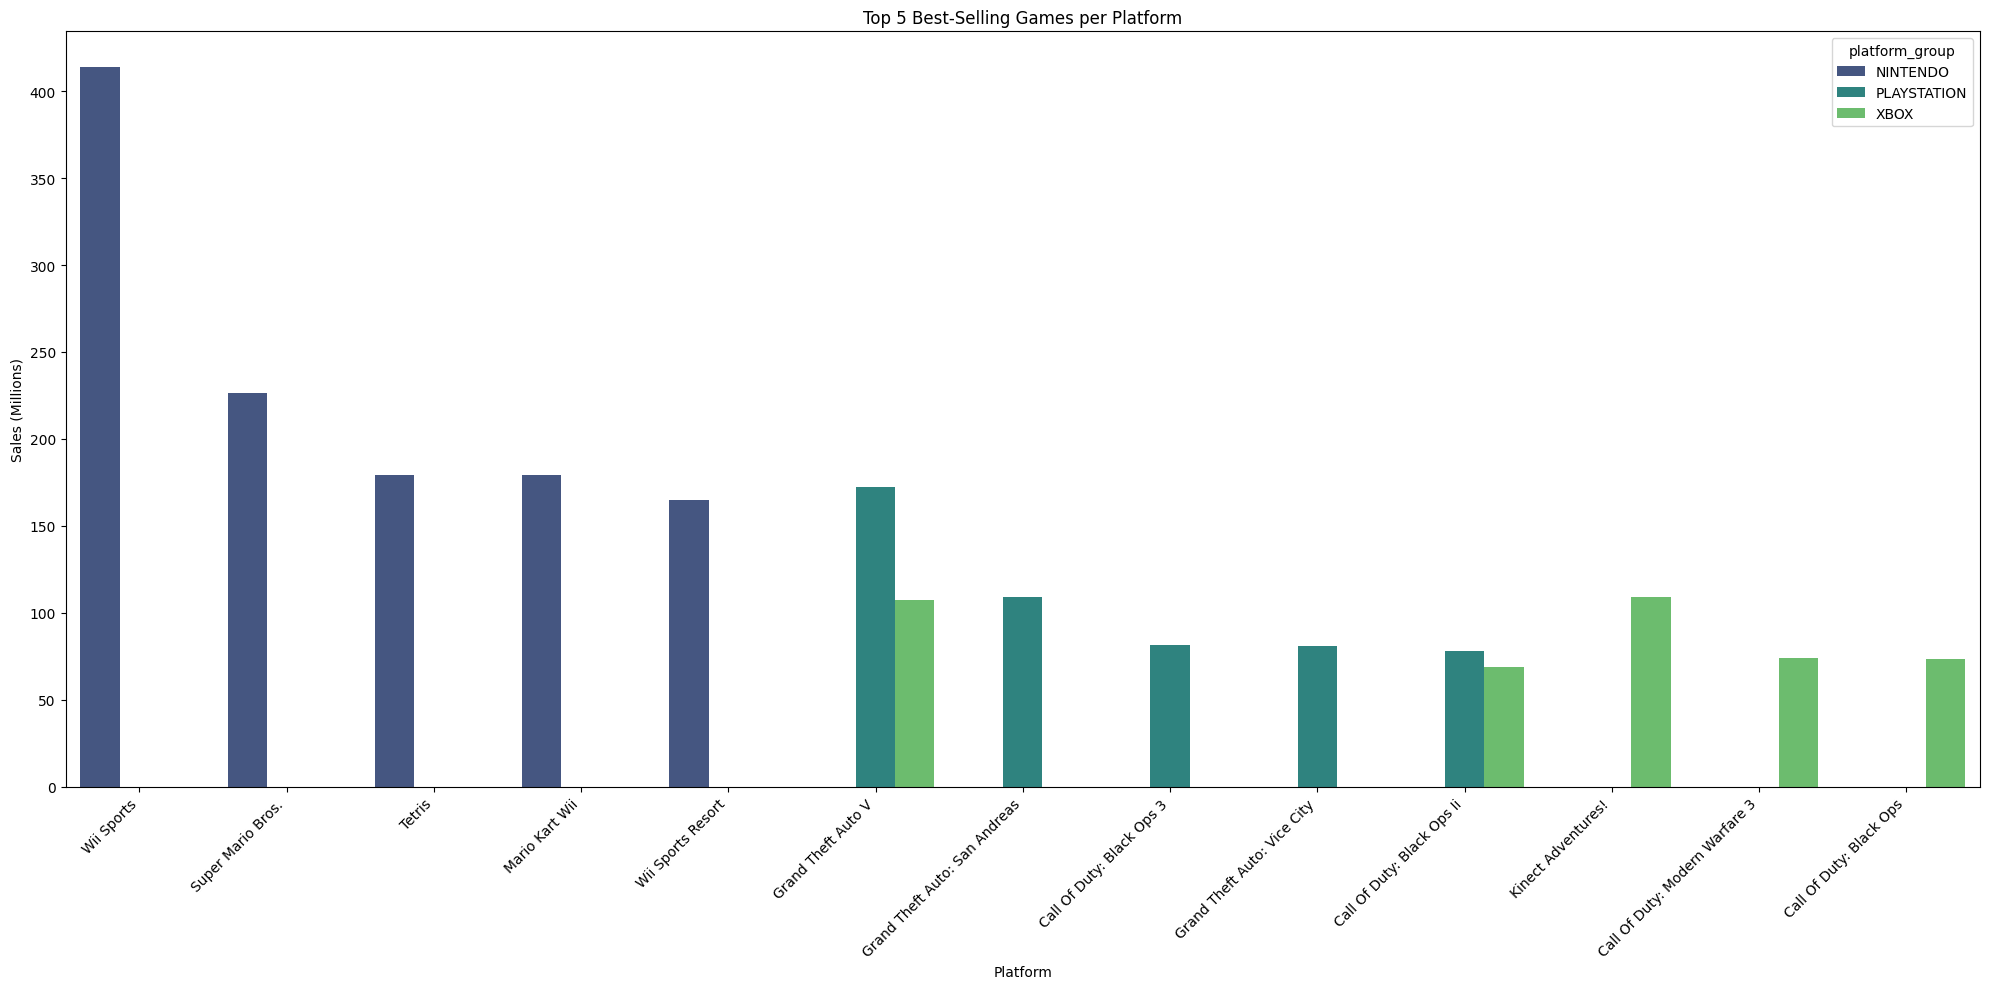

In [89]:
#20. top 5 best-selling games per platform
platform_sales=df_customer.groupby(['platform_group','name'])[['global_sales']].sum().reset_index()
top_5_games_per_platform = platform_sales.groupby('platform_group').apply(lambda x: x.nlargest(5, 'global_sales')).reset_index(drop=True)

plt.figure(figsize=(20, 10))
sns.barplot(data=top_5_games_per_platform, x='name', y='global_sales', hue='platform_group', palette='viridis')
plt.title('Top 5 Best-Selling Games per Platform')
plt.xlabel('Platform')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

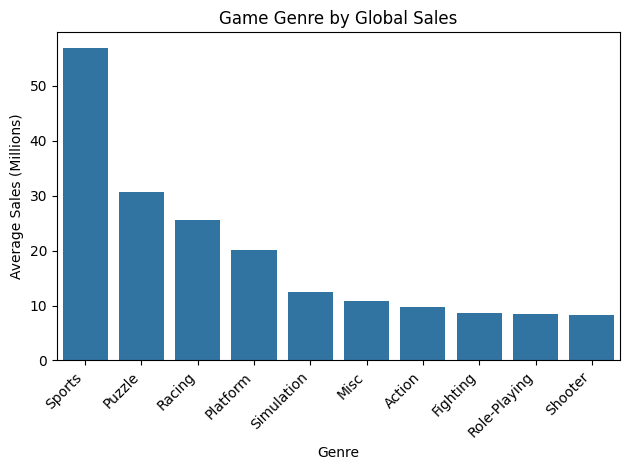

In [12]:
#21. game genres generate the most global sales
import matplotlib.pyplot as plt
import seaborn as sns

genre_avg_sales = df_merged.groupby('genre_x')[['global_sales']].mean().reset_index()

genre_avg_sales_sorted = genre_avg_sales.sort_values(by='global_sales', ascending=False)
sns.barplot(data=genre_avg_sales_sorted.head(10), x='genre_x', y='global_sales')

plt.title('Game Genre by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Average Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

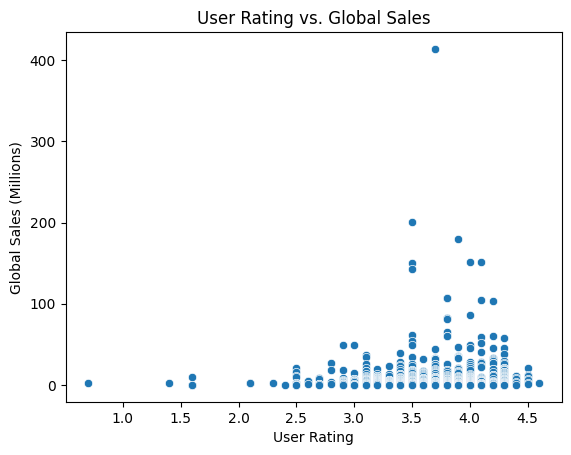

In [14]:
#22. user rating affect global sales

sns.scatterplot(data=df_merged, x='rating', y='global_sales')
plt.title('User Rating vs. Global Sales')
plt.xlabel('User Rating')
plt.ylabel('Global Sales (Millions)')
plt.show()

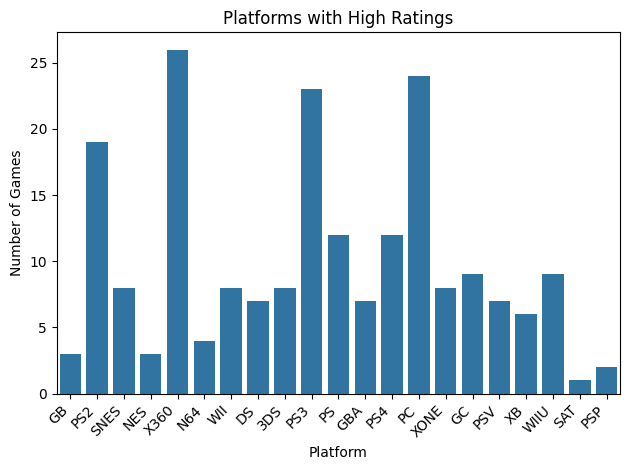

In [20]:
#23. platforms have the most games with high ratings
high_rating = df_merged[df_merged['rating'] >= 4.0]

sns.countplot(data=high_rating, x='platform')

plt.title('Platforms with High Ratings')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

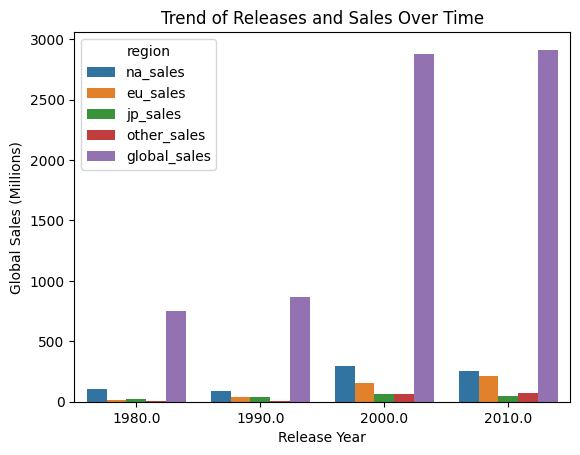

In [26]:
#24. the trend of releases and sales over time

avg_sales = df_merged.groupby('decade')[['na_sales','eu_sales','jp_sales','other_sales','global_sales']].sum().reset_index()

avg_sales_melted = avg_sales.melt(id_vars='decade', var_name='region', value_name='sales')

sns.barplot(data=avg_sales_melted, x='decade', y='sales',hue='region')
plt.title('Trend of Releases and Sales Over Time')
plt.xlabel('Release Year')
plt.ylabel('Global Sales (Millions)')
plt.show()



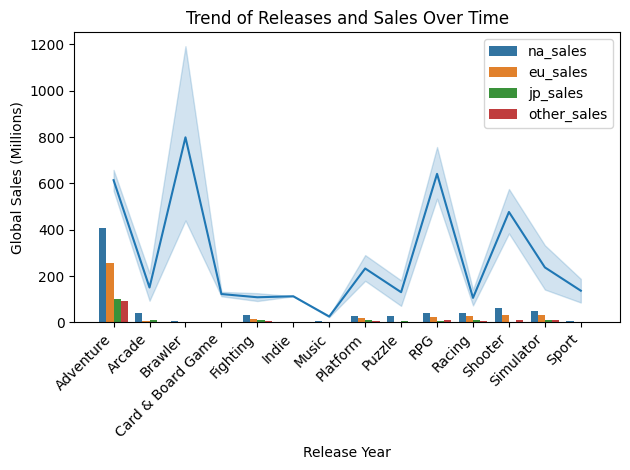

In [35]:
#25. wishlist games lead to more sales
wishlist_sales = df_merged.groupby('genre_y')[['na_sales','eu_sales','jp_sales','other_sales']].sum().reset_index()

avg_sales_melted = wishlist_sales.melt(id_vars='genre_y', var_name='region', value_name='sales')

sns.barplot(data=avg_sales_melted, x='genre_y', y='sales',hue='region')

plt.title('Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

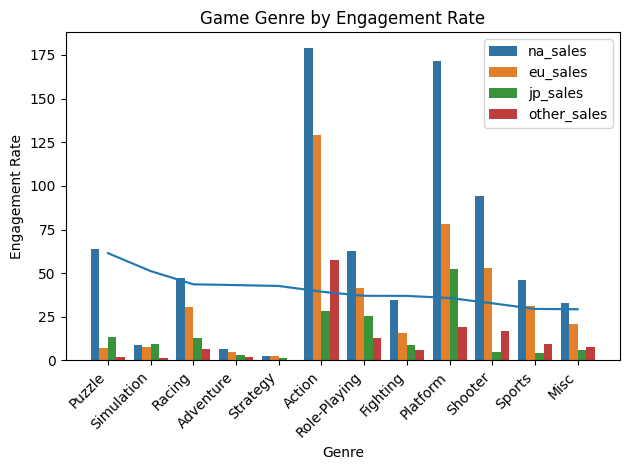

In [58]:
#26. genres have the highest engagement but lowest sales
genre_engagement = df_merged.groupby('genre_x')[['wishlist','backlogs']].sum().reset_index()
genre_engagement['total_ratings'] = genre_engagement['wishlist'] + genre_engagement['backlogs']
genre_engagement['engagement_rate'] = (genre_engagement['wishlist'] / genre_engagement['backlogs'])*100

genre_sales = df_merged.groupby('genre_x')[['na_sales','eu_sales','jp_sales','other_sales']].sum().reset_index()
genre_sales_melted=genre_sales.melt(id_vars='genre_x', var_name='region', value_name='sales')
genre_engagement_sales = pd.merge(genre_engagement, genre_sales_melted, on='genre_x', how='inner')

genre_engagement_sales_melted_sorted = genre_engagement_sales.sort_values(by='engagement_rate', ascending=False)

sns.barplot(data=genre_engagement_sales_melted_sorted, x='genre_x', y='sales',hue='region')
sns.lineplot(data=genre_engagement_sales_melted_sorted, x='genre_x', y='engagement_rate')

plt.title('Game Genre by Engagement Rate')
plt.xlabel('Genre')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



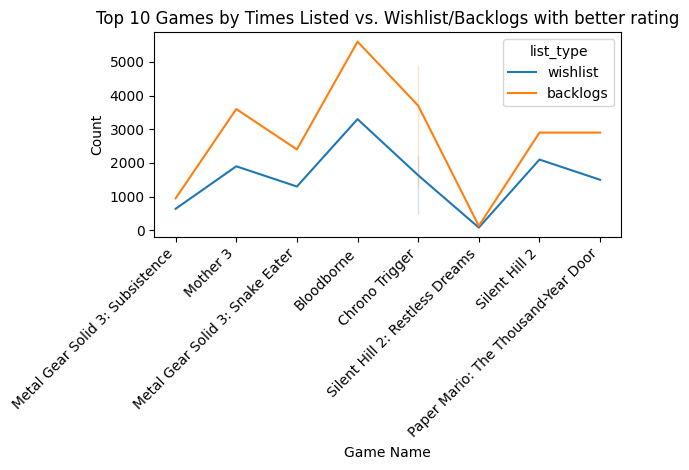

In [67]:
#27. highly listed games (wishlist/backlogs) correlate with better ratings
times_listed=df_merged.sort_values(by='rating', ascending=False).head(10)


times_listed_melted = times_listed.melt(id_vars='name', value_vars=['wishlist', 'backlogs'], var_name='list_type', value_name='count')

sns.lineplot(data=times_listed_melted, x='name', y='count', hue='list_type')
plt.title('Top 10 Games by Times Listed vs. Wishlist/Backlogs with better rating')
plt.xlabel('Game Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

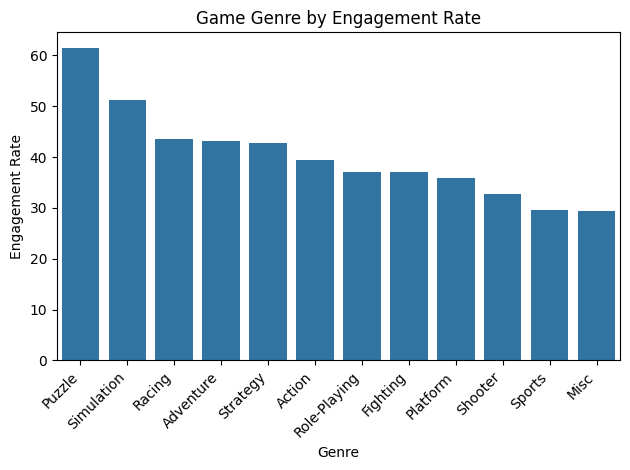

In [68]:
#28. user engagement differ across genres
sns.barplot(data=genre_engagement_sales_melted_sorted, x='genre_x', y='engagement_rate')
plt.title('Game Genre by Engagement Rate')
plt.xlabel('Genre')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

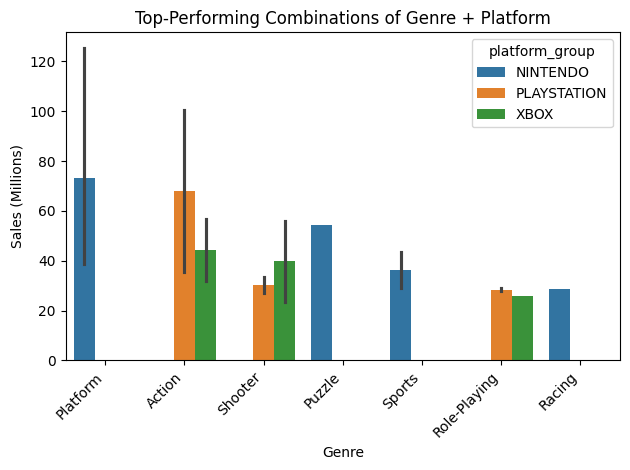

In [79]:
#29. the top-performing combinations of Genre + Platform
genre_platform_sales = df_merged.groupby(['genre_x', 'platform_group'])[['na_sales','eu_sales','jp_sales','other_sales']].sum().reset_index()

genre_platform_sales_melted=genre_platform_sales.melt(id_vars=['genre_x', 'platform_group'], var_name='region', value_name='sales')

genre_platform_sales_melted_sorted = genre_platform_sales_melted.sort_values(by='sales', ascending=False)

sns.barplot(data=genre_platform_sales_melted_sorted.head(20), x='genre_x', y='sales',hue='platform_group')

plt.title('Top-Performing Combinations of Genre + Platform')
plt.xlabel('Genre')
plt.ylabel('Sales (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

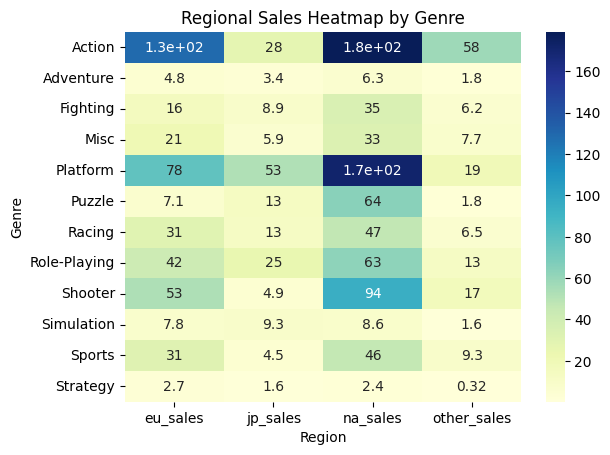

In [84]:
#30. regional sales heatmap by genre reveal
genre_sales_heatmap = df_merged.groupby('genre_x')[['na_sales','eu_sales','jp_sales','other_sales']].sum().reset_index()
genre_sales_heatmap_melt=genre_sales_heatmap.melt(id_vars='genre_x', var_name='region', value_name='sales')

genre_sales_heatmap_pivot = genre_sales_heatmap_melt.pivot(index='genre_x', columns='region', values='sales')

sns.heatmap(genre_sales_heatmap_pivot, annot=True, cmap='YlGnBu')

plt.title('Regional Sales Heatmap by Genre')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.show()